In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/credit_data.csv')

In [3]:
df.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education


In [4]:
df.notnull().sum()

Unnamed: 0          1000
Age                 1000
Sex                 1000
Job                 1000
Housing             1000
Saving accounts      817
Checking account     606
Credit amount       1000
Duration            1000
Purpose             1000
dtype: int64

In [5]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [8]:
num_df = df[['Age', 'Duration', 'Credit amount']]

In [9]:
scaler = StandardScaler()
num_df_scaled = scaler.fit_transform(num_df)

In [10]:
#show scaled dataset values
num_df_scaled

array([[ 2.76645648, -1.23647786, -0.74513141],
       [-1.19140394,  2.24819436,  0.94981679],
       [ 1.18331231, -0.73866754, -0.41656241],
       ...,
       [ 0.21583532, -0.73866754, -0.87450324],
       [-1.10345149,  1.9992892 , -0.50552769],
       [-0.75164167,  1.9992892 ,  0.46245715]])

In [11]:
#show scaled dataset shape
num_df_scaled.shape

(1000, 3)

In [12]:
from sklearn.cluster import KMeans

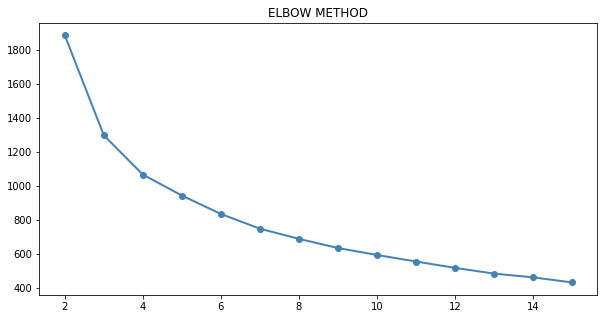

In [13]:
# elbow method 
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(num_df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('ELBOW METHOD')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2, color='steelblue');

In [14]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(num_df_scaled)

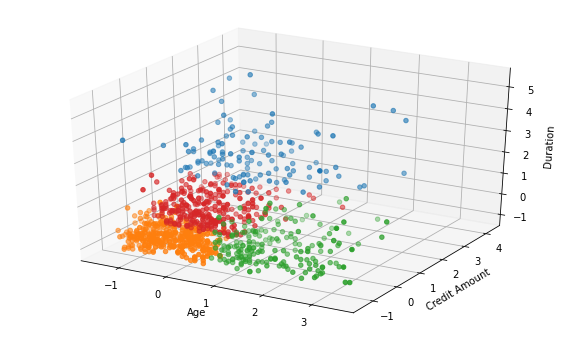

In [19]:
#showing a 3D plot of clusters
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Age')
ax.set_ylabel('Credit Amount')
ax.set_zlabel('Duration')

for i in range(4):
    ax.scatter(num_df_scaled[clusters ==i,0], num_df_scaled[clusters ==i,1], num_df_scaled[clusters ==i,2])
    

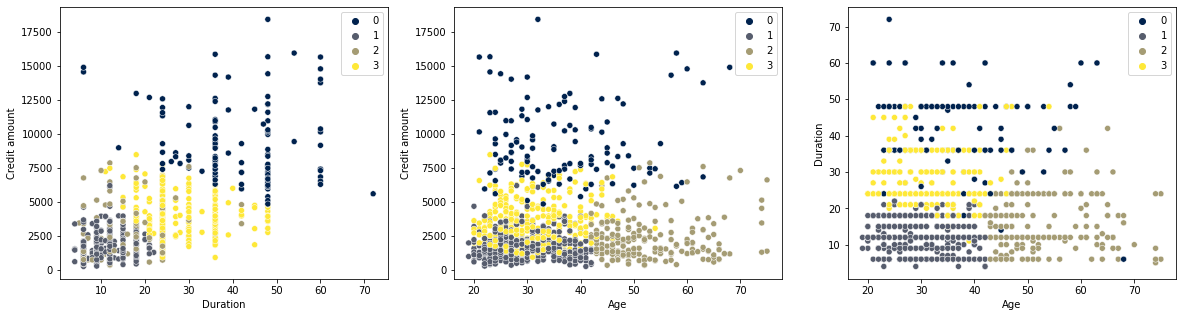

In [20]:
# Drawing bi-variate scatter plots

fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(df['Duration'], df['Credit amount'], hue=clusters, ax=ax[0], palette='cividis');
sns.scatterplot(df['Age'], df['Credit amount'], hue=clusters, ax=ax[1], palette='cividis');
sns.scatterplot(df['Age'], df['Duration'], hue=clusters, ax=ax[2], palette='cividis');

In [21]:
# Create a data frame for sumarized results
df_clustered = df[['Age', 'Duration', 'Credit amount']]

In [22]:
df_clustered.head()

,Age,Duration,Credit amount
0,67,6,1169
1,22,48,5951
2,49,12,2096
3,45,42,7882
4,53,24,4870


In [23]:
df_clustered['cluster'] = clusters
df_clustered.head()

,Age,Duration,Credit amount,cluster
0,67,6,1169,2
1,22,48,5951,0
2,49,12,2096,2
3,45,42,7882,0
4,53,24,4870,2


In [24]:
df_clustered.groupby('cluster').mean()

,Age,Duration,Credit amount
cluster,,,
0,36.341880,41.034188,9359.487179
1,29.801527,12.407125,1730.073791
2,52.843434,15.969697,2331.484848
3,31.229452,27.616438,3543.304795


## Interpret the Results

* Cluster 0 are customers in their 30s, with high loan duration, and high credit amount.
* Cluster 1 are younger customers, with the lowest duration and the lowest credit
* Cluster 2 are older customers with moderate loan duration and a moderate credit amount
* Cluster 4 are customers in their early 30s with moderate loan duration and higher moderate credit amount